In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from numpy.random import randn
from numpy import arange
from statsmodels.tsa.tsatools import lagmat
from numpy import corrcoef
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
f1=pd.read_csv(r'data2.csv')
f=pd.read_csv(r'data1.csv')

In [ ]:
f.YEAR=f.YEAR.astype('str')
f.MO=f.MO.astype('str')
f.DY=f.DY.astype('str')
f['date']=f.YEAR+'/'+f.MO+'/'+f.DY
f.date=pd.to_datetime(f.date)

In [ ]:
f1.YEAR=f1.YEAR.astype('str')
f1.MO=f1.MO.astype('str')
f1.DY=f1.DY.astype('str')
f1['date']=f1.YEAR+'/'+f1.MO+'/'+f1.DY
f1.date=pd.to_datetime(f1.date)

In [ ]:
f.merge(f1,how='left',left_on='date',right_on='date')

df=f.merge(f1,how='left',left_on='date',right_on='date')

#df.isna().sum()
df.to_csv(r'C:\new.csv')

data=df.drop(columns=['LAT_y', 'LON_y', 'YEAR_y', 'MO_y', 'DY_y'], axis=1)

In [ ]:
 #evaluate an SARIMAX model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-6-c4db40ed1bcb>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:

# split into train and test sets
X = data.T2M_MAX
X = X.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
erreur = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    erreur.append(abs(obs-yhat))
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=15.397633, expected=15.930000
predicted=16.004538, expected=17.260000
predicted=17.155774, expected=17.740000
predicted=17.357070, expected=16.850000
predicted=16.701999, expected=16.600000
predicted=16.580258, expected=16.570000
predicted=16.590290, expected=16.750000
predicted=16.847046, expected=15.890000
predicted=16.109463, expected=16.190000
predicted=16.385205, expected=16.230000
predicted=16.271484, expected=15.920000
predicted=16.002939, expected=15.740000
predicted=15.900325, expected=16.230000
predicted=16.222306, expected=16.060000
predicted=16.019468, expected=16.570000
predicted=16.511390, expected=15.870000
predicted=15.815681, expected=15.360000
predicted=15.513317, expected=16.010000
predicted=16.126327, expected=19.500000
predicted=18.915908, expected=13.810000
predicted=13.734497, expected=14.690000
predicted=15.494925, expected=16.640000
predicted=16.551208, expected=14.820000
predicted=14.804764, expected=13.200000
predicted=14.117404, expected=14.370000


predicted=36.276932, expected=28.890000
predicted=28.514852, expected=30.480000
predicted=31.299862, expected=35.720000
predicted=35.068881, expected=33.590000
predicted=33.014245, expected=37.260000
predicted=37.025957, expected=31.710000
predicted=31.020638, expected=34.300000
predicted=34.519126, expected=35.970000
predicted=35.696837, expected=31.530000
predicted=31.677234, expected=30.660000
predicted=31.975385, expected=27.950000
predicted=28.900444, expected=27.430000
predicted=28.871786, expected=30.380000
predicted=31.151875, expected=30.930000
predicted=30.587317, expected=31.710000
predicted=31.269594, expected=29.580000
predicted=29.235212, expected=30.320000
predicted=30.265777, expected=30.720000
predicted=30.663712, expected=32.520000
predicted=32.210376, expected=35.360000
predicted=34.465392, expected=38.580000
predicted=36.824662, expected=30.640000
predicted=30.171130, expected=30.130000
predicted=31.260081, expected=30.790000
predicted=31.497420, expected=34.590000


predicted=16.098249, expected=15.700000
predicted=16.010132, expected=14.140000
predicted=14.307124, expected=12.940000
predicted=13.130297, expected=12.380000
predicted=12.890288, expected=11.180000
predicted=11.942733, expected=11.010000
predicted=11.810347, expected=12.830000
predicted=13.017503, expected=12.510000
predicted=12.313213, expected=13.900000
predicted=13.593581, expected=17.530000
predicted=16.393254, expected=19.310000
predicted=17.613344, expected=11.960000
predicted=11.803504, expected=11.060000
predicted=12.268119, expected=16.300000
predicted=16.416390, expected=18.450000
predicted=17.642044, expected=11.810000
predicted=12.231096, expected=12.300000
predicted=13.060236, expected=12.090000
predicted=12.323102, expected=12.220000
predicted=12.855905, expected=10.480000
predicted=11.415309, expected=14.730000
predicted=14.497116, expected=17.060000
predicted=15.825713, expected=17.030000
predicted=15.835905, expected=14.970000
predicted=14.480822, expected=14.530000


predicted=32.983826, expected=32.500000
predicted=32.645964, expected=34.120000
predicted=33.796014, expected=29.370000
predicted=29.466371, expected=31.580000
predicted=32.143110, expected=34.810000
predicted=34.343572, expected=31.170000
predicted=30.926219, expected=30.390000
predicted=31.146716, expected=30.490000
predicted=30.667934, expected=31.980000
predicted=32.021133, expected=34.340000
predicted=34.030189, expected=36.480000
predicted=35.278318, expected=32.270000
predicted=31.684190, expected=34.450000
predicted=34.406261, expected=33.090000
predicted=32.909230, expected=32.790000
predicted=33.180586, expected=33.050000
predicted=33.487947, expected=32.960000
predicted=32.912518, expected=33.510000
predicted=33.588654, expected=34.510000
predicted=34.209804, expected=33.810000
predicted=33.524574, expected=36.070000
predicted=35.659089, expected=37.460000
predicted=36.535240, expected=31.960000
predicted=32.018684, expected=30.040000
predicted=31.392460, expected=29.230000


predicted=21.355914, expected=15.880000
predicted=14.940178, expected=15.010000
predicted=15.975910, expected=18.190000
predicted=18.261962, expected=12.790000
predicted=13.268486, expected=15.850000
predicted=17.130325, expected=11.000000
predicted=11.556061, expected=12.610000
predicted=13.558428, expected=15.290000
predicted=15.445357, expected=16.620000
predicted=15.719529, expected=18.880000
predicted=17.954898, expected=16.490000
predicted=15.453246, expected=17.750000
predicted=17.327724, expected=17.120000
predicted=16.845880, expected=21.230000
predicted=20.610001, expected=24.940000
predicted=23.397627, expected=23.000000
predicted=21.485910, expected=24.880000
predicted=23.934913, expected=17.680000
predicted=17.705341, expected=15.960000
predicted=17.769444, expected=17.110000
predicted=18.656509, expected=19.060000
predicted=19.554943, expected=22.690000
predicted=22.370015, expected=22.060000
predicted=20.819032, expected=23.750000
predicted=22.595152, expected=29.200000


predicted=25.142921, expected=25.340000
predicted=26.061174, expected=23.500000
predicted=23.899943, expected=23.060000
predicted=23.818610, expected=28.030000
predicted=27.580785, expected=30.230000
predicted=28.706247, expected=29.900000
predicted=28.692522, expected=29.230000
predicted=28.380733, expected=29.890000
predicted=29.202004, expected=27.410000
predicted=27.553351, expected=28.290000
predicted=28.849617, expected=27.550000
predicted=27.850799, expected=28.330000
predicted=28.529323, expected=25.760000
predicted=26.222204, expected=26.030000
predicted=26.570844, expected=26.710000
predicted=26.963546, expected=27.040000
predicted=27.025708, expected=30.840000
predicted=30.258066, expected=27.180000
predicted=26.518358, expected=26.950000
predicted=27.196391, expected=26.110000
predicted=26.406673, expected=26.030000
predicted=26.428675, expected=28.030000
predicted=28.305947, expected=25.520000
predicted=25.516949, expected=24.310000
predicted=24.935605, expected=23.470000


predicted=21.033872, expected=18.080000
predicted=19.451434, expected=17.320000
predicted=18.521970, expected=18.680000
predicted=19.463852, expected=23.980000
predicted=23.661158, expected=22.950000
predicted=21.775911, expected=24.000000
predicted=23.042308, expected=27.030000
predicted=25.557642, expected=26.160000
predicted=24.858247, expected=21.630000
predicted=22.000046, expected=20.100000
predicted=21.221666, expected=23.240000
predicted=23.795127, expected=25.150000
predicted=24.981412, expected=21.350000
predicted=21.540132, expected=25.030000
predicted=24.873271, expected=28.970000
predicted=27.415001, expected=32.810000
predicted=30.772575, expected=28.710000
predicted=27.460141, expected=23.810000
predicted=24.088429, expected=23.200000
predicted=24.454289, expected=25.010000
predicted=25.958652, expected=28.360000
predicted=28.554519, expected=34.010000
predicted=32.456554, expected=30.610000
predicted=28.773928, expected=27.290000
predicted=27.066697, expected=27.080000


predicted=18.290914, expected=18.880000
predicted=19.219057, expected=19.670000
predicted=19.437845, expected=18.160000
predicted=18.404629, expected=14.430000
predicted=15.598683, expected=14.630000
predicted=15.685097, expected=16.200000
predicted=16.708349, expected=18.160000
predicted=18.066279, expected=18.590000
predicted=18.065527, expected=18.490000
predicted=17.788343, expected=18.480000
predicted=17.989832, expected=20.130000
predicted=19.624774, expected=20.940000
predicted=20.329837, expected=17.650000
predicted=17.651521, expected=20.050000
predicted=20.202374, expected=22.410000
predicted=21.694050, expected=17.580000
predicted=17.620091, expected=15.150000
predicted=16.444415, expected=16.610000
predicted=17.349279, expected=23.030000
predicted=22.491065, expected=16.940000
predicted=16.709454, expected=14.410000
predicted=15.366964, expected=11.370000
predicted=12.613427, expected=12.810000
predicted=14.049122, expected=14.130000
predicted=15.082531, expected=15.130000


predicted=30.276572, expected=25.610000
predicted=25.742421, expected=29.060000
predicted=29.511139, expected=25.420000
predicted=25.758454, expected=27.290000
predicted=28.050432, expected=27.850000
predicted=28.018742, expected=32.510000
predicted=31.405643, expected=34.000000
predicted=32.503224, expected=32.170000
predicted=30.919840, expected=29.230000
predicted=29.228277, expected=27.910000
predicted=28.572306, expected=26.490000
predicted=27.715269, expected=26.120000
predicted=27.408551, expected=27.950000
predicted=28.513221, expected=28.290000
predicted=28.134511, expected=27.240000
predicted=27.176290, expected=27.320000
predicted=27.321225, expected=28.310000
predicted=28.085011, expected=30.450000
predicted=29.931444, expected=31.720000
predicted=30.846753, expected=31.450000
predicted=30.605160, expected=30.340000
predicted=29.958807, expected=28.520000
predicted=28.764584, expected=27.430000
predicted=28.211548, expected=27.710000
predicted=28.481423, expected=32.100000


predicted=16.519235, expected=15.760000
predicted=16.225096, expected=15.010000
predicted=15.516136, expected=15.660000
predicted=16.160067, expected=15.580000
predicted=15.910809, expected=15.560000
predicted=15.659551, expected=15.690000
predicted=15.678063, expected=15.390000
predicted=15.349212, expected=16.190000
predicted=16.131282, expected=12.810000
predicted=13.171910, expected=10.920000
predicted=12.032746, expected=12.880000
predicted=13.630566, expected=14.380000
predicted=14.332197, expected=14.720000
predicted=14.504739, expected=14.040000
predicted=13.705312, expected=14.030000
predicted=13.744195, expected=11.340000
predicted=11.696049, expected=10.730000
predicted=11.628019, expected=11.980000
predicted=12.516764, expected=13.430000
predicted=13.338814, expected=16.510000
predicted=15.752087, expected=15.840000
predicted=14.723166, expected=15.730000
predicted=15.031791, expected=15.380000
predicted=15.012960, expected=16.340000
predicted=16.073349, expected=14.440000


predicted=32.561413, expected=32.410000
predicted=32.424099, expected=33.690000
predicted=33.188280, expected=33.340000
predicted=32.638251, expected=33.500000
predicted=33.221626, expected=34.750000
predicted=34.368601, expected=34.970000
predicted=34.475156, expected=35.360000
predicted=35.017193, expected=38.500000
predicted=37.650231, expected=36.140000
predicted=35.430900, expected=33.850000
predicted=34.204800, expected=32.930000
predicted=33.673000, expected=33.470000
predicted=34.055833, expected=34.880000
predicted=35.240698, expected=38.550000
predicted=37.834371, expected=40.600000
predicted=39.021005, expected=35.740000
predicted=35.031635, expected=36.380000
predicted=36.564131, expected=36.760000
predicted=36.759924, expected=37.610000
predicted=37.702753, expected=41.270000
predicted=40.794841, expected=37.800000
predicted=37.085419, expected=35.580000
predicted=36.049069, expected=36.290000
predicted=36.834306, expected=36.840000
predicted=37.066027, expected=38.310000


predicted=17.369591, expected=18.440000
predicted=18.079151, expected=19.770000
predicted=18.691766, expected=19.870000
predicted=18.793879, expected=19.160000
predicted=18.575455, expected=21.100000
predicted=20.631237, expected=18.420000
predicted=18.308651, expected=17.340000
predicted=17.975129, expected=17.300000
predicted=17.903634, expected=17.340000
predicted=17.719105, expected=17.570000
predicted=17.958391, expected=16.440000
predicted=16.672024, expected=16.720000
predicted=16.938349, expected=17.500000
predicted=17.470575, expected=16.120000
predicted=16.214433, expected=18.370000
predicted=18.311724, expected=19.680000
predicted=18.970989, expected=22.930000
predicted=21.734510, expected=18.520000
predicted=17.938297, expected=17.270000
predicted=17.654464, expected=20.150000
predicted=20.253061, expected=23.510000
predicted=22.686604, expected=22.960000


In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.285


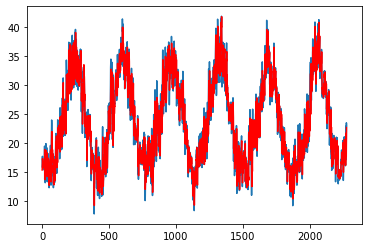

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11382
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -25496.794
Date:                Sun, 06 Jun 2021   AIC                          51005.588
Time:                        19:37:35   BIC                          51049.626
Sample:                             0   HQIC                         51020.399
                              - 11382                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1633      0.009    -19.082      0.000      -0.180      -0.147
ar.L2         -0.2731      0.009    -31.258      0.000      -0.290      -0.256
ar.L3         -0.1867      0.009    -20.485      0.0

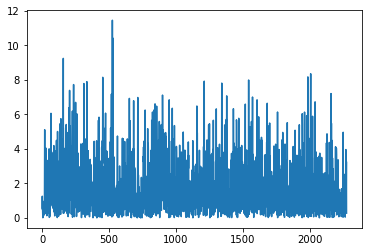

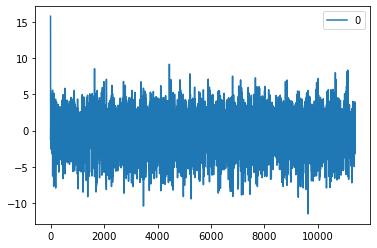

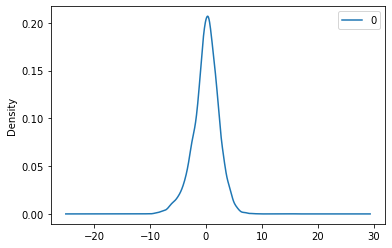

                  0
count  11382.000000
mean       0.002350
std        2.278343
min      -11.468921
25%       -1.246268
50%        0.152635
75%        1.443426
max       15.750000


In [ ]:
from pandas import DataFrame
# summary of fit model
print(model_fit.summary())
#errreur
print (erreur)

plt.plot(erreur)
plt.show()


# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Import the folium library
import folium

# Build the default map for a specific location (Tunisie)
map = folium.Map(location=[float(data.LAT_x[0]),data.LON_x[0]],zoom_start=7)

#save in a file
map.save("index.html")

tooltip = "Click Here For More Info"

marker = folium.Marker(
    location=[float(data.LAT_x[0]),data.LON_x[0]],
    popup=output,
    tooltip=tooltip)
marker.add_to(map)
map